---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 4: Modelos climáticos globales </font>**
### **<font color="DodgerBlue"> Notebook 2: Promedios globales y ciclo anual </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

En este notebook pasaremos de ver temas puntuales a hacer análisis típicos de modelos climáticos como lo son: 

1) Promedio de área global o regional. 

2) Ciclo anual.



In [2]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [3]:
filename='tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [4]:
ds=xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 86MB
Dimensions:    (time: 780, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 12kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 86MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-19T12:07:37Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/bc7c9a22-a05f-4154-9781-2b2cd934748e

In [5]:
tas=ds['tas']


### **<font color="ForestGreen"> 1. El promedio global </font>**

Teniendo datos globales y el conocimiento de cómo obtener promedios en Xarray seguramente pensará usted en obtener un promedio global. Un promedio global permite comprender la distribución y las tendencias de la temperatura en todo el mundo y **evaluar modelos climáticos**. Esto es crucial para el estudio del cambio climático y la variabilidad climática a largo plazo. El primer ejercicio de este notebook mostrará como calcular el promedio global de nuestra variable de temperatura superficial.

El promedio global, a la manera chacalona, se puede hacer de la siguiente forma:

In [6]:
global1=tas.mean(['lon','lat'])
global1

<xarray.DataArray 'tas' (time: 780)> Size: 3kB
array([275.6103 , 274.28607, 274.27698, 275.83987, 277.92606, 279.51917,
       280.01724, 279.76724, 278.32666, 277.16647, 276.48785, 275.69812,
       275.24957, 274.1554 , 274.1747 , 276.0686 , 278.43103, 279.42932,
       280.08307, 279.9168 , 278.71503, 277.16733, 276.99918, 276.29767,
       275.69843, 274.39694, 274.75024, 275.90845, 277.5825 , 279.97302,
       279.93182, 279.45483, 278.33786, 277.5896 , 276.98834, 276.55112,
       276.18344, 275.248  , 274.58392, 276.44128, 278.60977, 279.98297,
       280.0062 , 280.0104 , 278.653  , 277.30545, 277.10614, 276.63022,
       276.13394, 274.9614 , 274.5481 , 276.34137, 277.70938, 279.78204,
       280.42242, 280.02753, 278.82666, 277.7175 , 276.9115 , 276.57422,
       275.98227, 275.088  , 274.5423 , 275.86935, 278.1102 , 279.23822,
       280.23206, 279.58417, 278.8189 , 277.13977, 276.80487, 276.8425 ,
       275.9115 , 274.75696, 275.19504, 275.96292, 278.05017, 279.71237,
       279.9259 , 279.99225, 279.1688 , 277.70175, 276.72458, 276.4656 ,
       275.77957, 275.06265, 275.01828, 276.21353, 278.16998, 279.70264,
       280.36667, 279.73013, 278.55453, 277.50977, 276.87723, 276.5973 ,
       275.86453, 274.9212 , 274.68393, 276.09085, 277.98584, 279.86224,
       280.18402, 279.61716, 278.7895 , 277.57016, 276.79453, 276.29944,
       275.77686, 274.61588, 274.74356, 276.2218 , 277.97034, 279.68347,
       279.99307, 280.04184, 278.8595 , 277.68442, 276.69348, 276.1731 ,
...
       281.16684, 280.9017 , 279.50937, 278.96356, 277.69638, 277.60452,
       276.57217, 275.77753, 275.72278, 276.76752, 279.28543, 280.78772,
       281.3757 , 281.10867, 279.93762, 279.04602, 278.30582, 277.53128,
       277.1648 , 275.84225, 275.78775, 277.04593, 279.14337, 280.9069 ,
       280.98975, 281.0134 , 279.59506, 278.32208, 277.69016, 277.5556 ,
       276.6828 , 275.8566 , 275.55383, 276.8943 , 279.22668, 280.40622,
       281.05942, 280.75125, 279.86276, 278.9559 , 277.87012, 277.143  ,
       276.4806 , 275.5235 , 275.48538, 276.73785, 278.99246, 280.1765 ,
       281.061  , 280.6869 , 279.8987 , 278.45105, 277.4783 , 277.49203,
       276.71097, 275.8733 , 276.17172, 277.082  , 279.00833, 280.70178,
       280.79504, 281.07135, 279.9279 , 279.01147, 277.9567 , 277.8141 ,
       277.0345 , 276.26224, 275.84378, 277.57965, 279.0301 , 280.70605,
       281.64188, 281.00613, 280.15622, 279.04742, 278.30356, 277.77182,
       277.3013 , 276.27914, 275.69568, 277.05582, 279.02777, 280.85306,
       281.38766, 281.1363 , 279.9821 , 278.72287, 278.37292, 277.74744,
       276.58252, 275.91428, 275.8103 , 276.98337, 279.19485, 280.67984,
       281.48486, 281.3251 , 280.01517, 279.26706, 278.29086, 277.5529 ,
       277.16852, 276.27582, 275.70572, 277.39645, 279.51114, 280.92203,
       281.28873, 281.47272, 280.3333 , 278.79706, 278.2393 , 277.80856],
      dtype=float32)
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    height   float64 8B ...

In [7]:
lats=tas.lat

Sin embargo, el cálculo del promedio de área es un poco más complicado, debido principalmente, a la curvatura de la Tierra y las implicaciones que esto tiene sobre cómo hicimos el promedio.

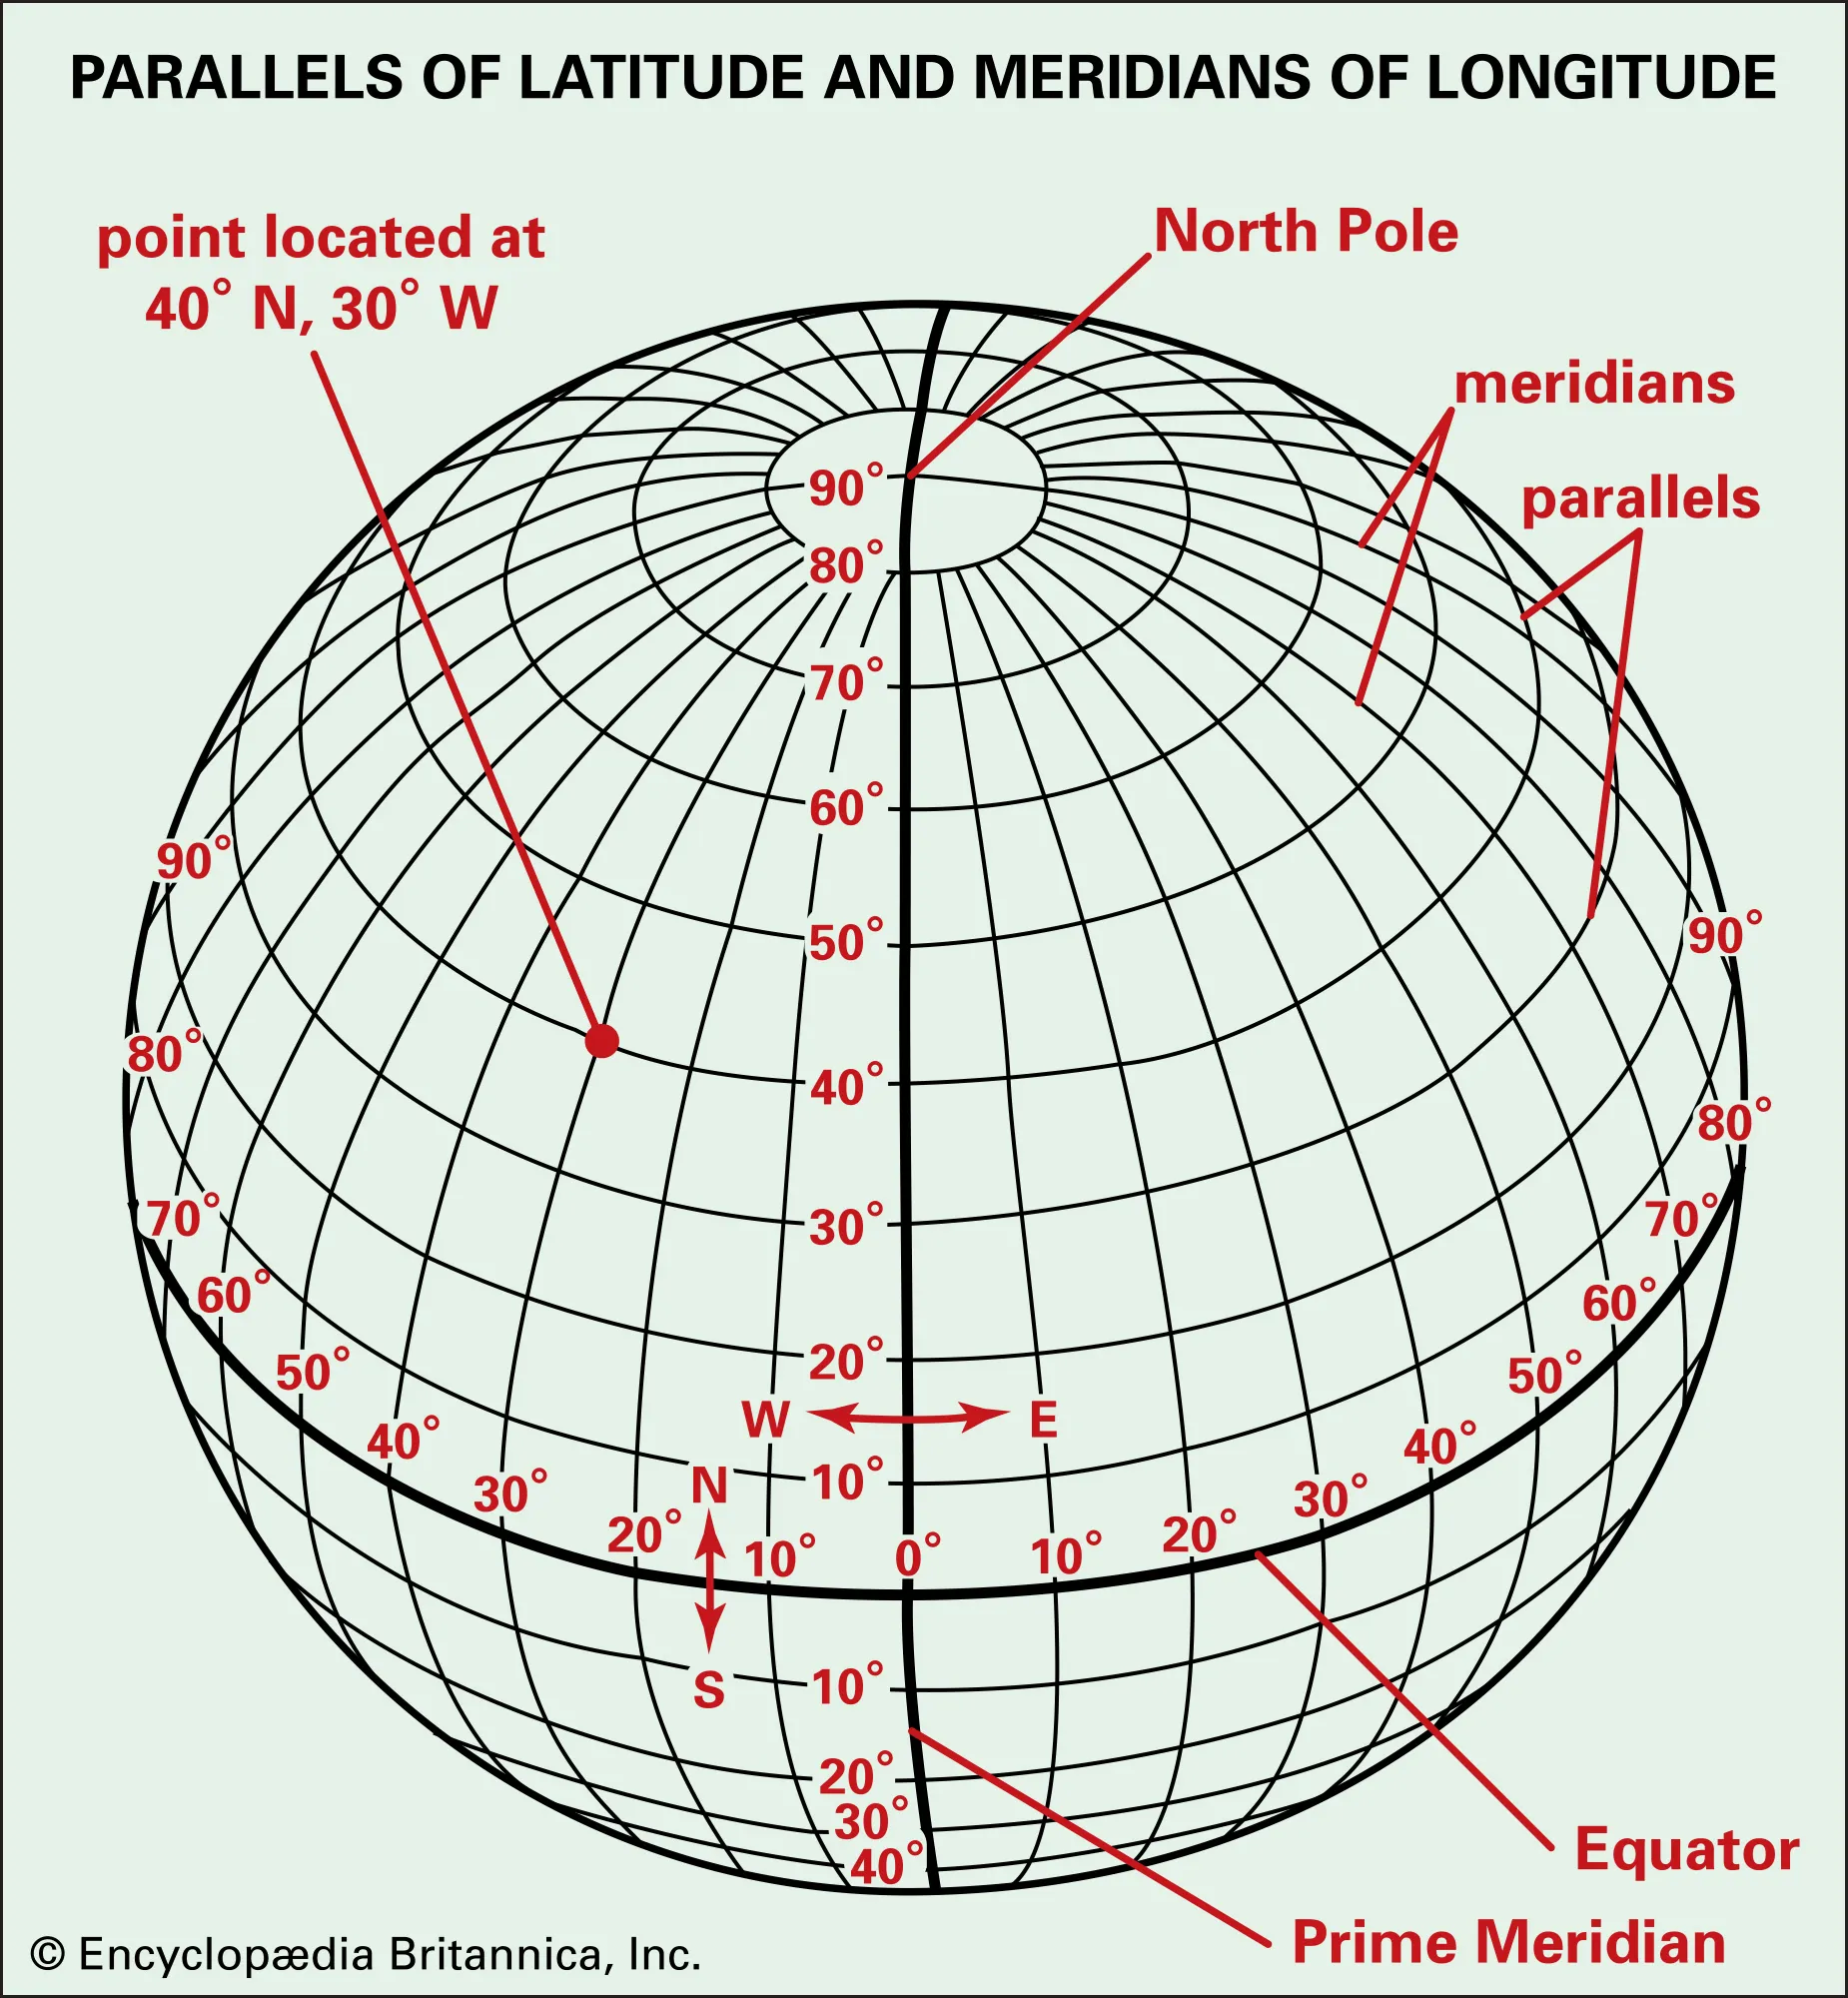
 
 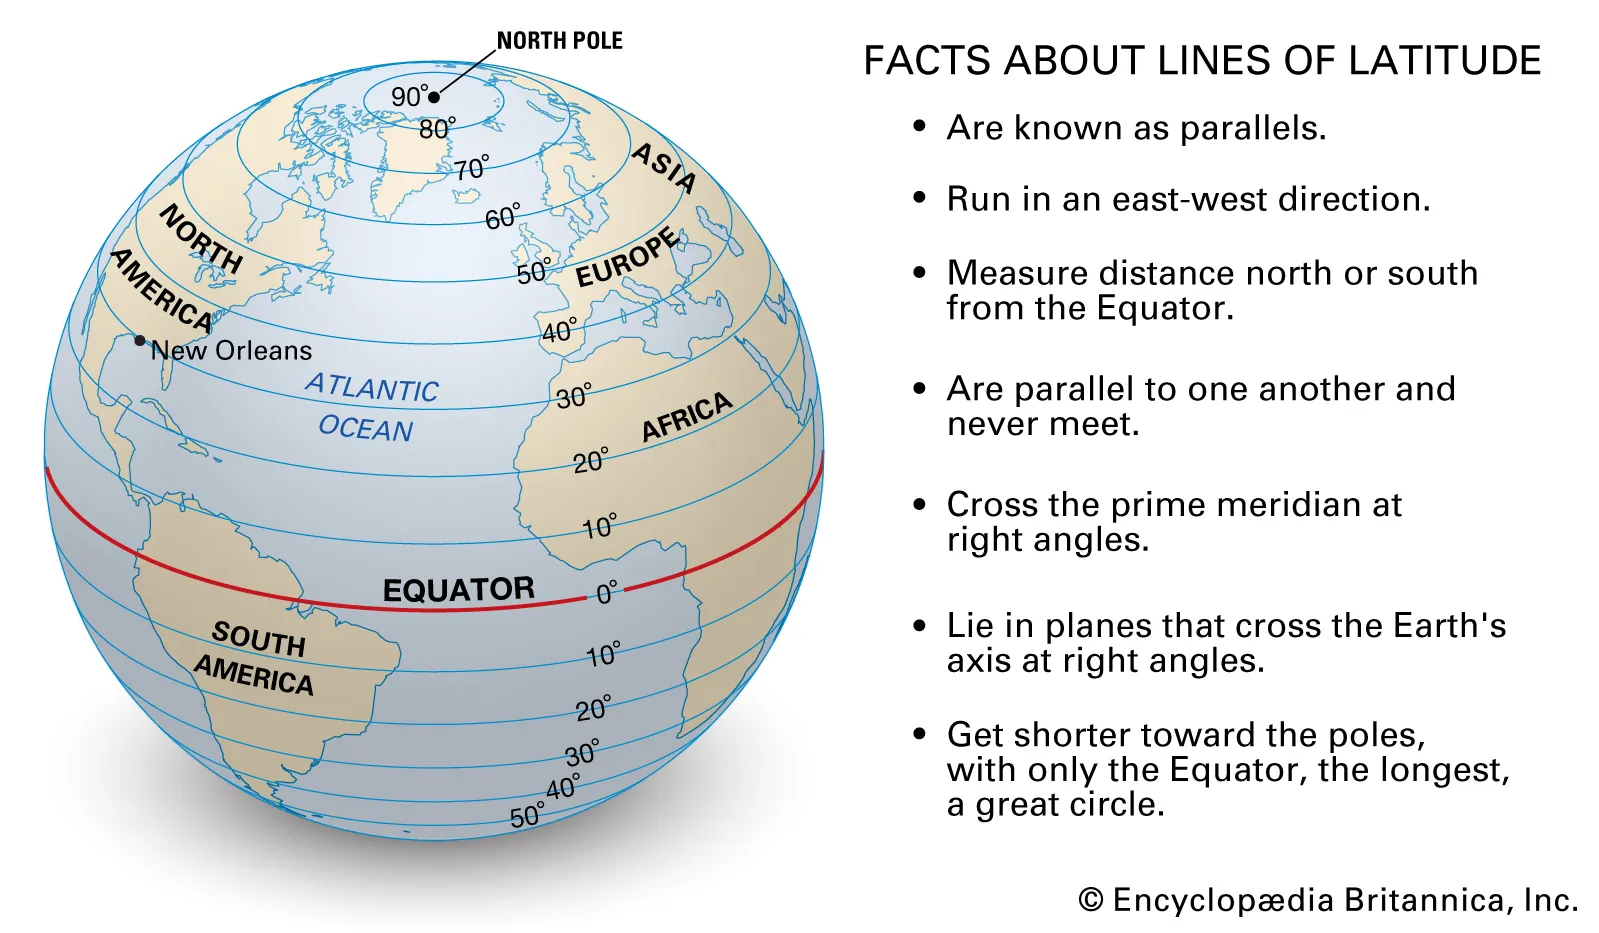
 
 La Tierra es esférica, lo que significa que además de que la temperatura no es uniforme en todas partes y varía según la latitud y la longitud, el área que cubre cada punto no es igual. Es decir, si tuviéramos que hacer un promedio verdaderamente promedio por área, cada punto en nuestro globlo tendría que tener la misma área representativa pero sabemos que no es así. Los puntos cerca del ecuador ocupan más área que lejos. 
 
 Por lo tanto, es necesario tener en cuenta la curvatura de la Tierra al calcular promedios globales de temperatura para evitar sesgos en los resultados.

Existen varios métodos para tener en cuenta la curvatura de la Tierra al calcular promedios globales de temperatura:

1. Pesos de Área: al calcular un promedio ponderado por área, se asignan pesos a cada punto de datos de temperatura basados en el área que representan en la superficie de la Tierra. Esto significa que los puntos de datos ubicados en áreas más grandes (cerca de los polos) tendrán un peso mayor que los puntos ubicados en áreas más pequeñas (cerca del ecuador). Esto compensa la distorsión causada por la curvatura de la Tierra y garantiza que cada área contribuya de manera equitativa al promedio global.

Una manera de asignar pesos a nuestro objeto sst es con la función coseno. El coseno de la latitud, por ejemplo, nos puede ayudar a medir los pesos. 

In [9]:
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 144)> Size: 1kB
array([0.01090809, 0.03271908, 0.0545145 , 0.07628397, 0.09801714,
       0.11970366, 0.1413332 , 0.16289547, 0.18438022, 0.20577721,
       0.22707626, 0.24826724, 0.26934005, 0.29028468, 0.31109114,
       0.33174954, 0.35225005, 0.3725829 , 0.39273843, 0.41270703,
       0.43247921, 0.45204555, 0.47139674, 0.49052357, 0.50941694,
       0.52806785, 0.54646743, 0.56460693, 0.5824777 , 0.60007124,
       0.61737918, 0.63439328, 0.65110545, 0.66750772, 0.6835923 ,
       0.69935153, 0.7147779 , 0.72986407, 0.74460287, 0.75898728,
       0.77301045, 0.78666571, 0.79994657, 0.81284668, 0.82535993,
       0.83748035, 0.84920218, 0.86051983, 0.87142793, 0.88192126,
       0.89199486, 0.90164391, 0.91086382, 0.91965022, 0.92799891,
       0.93590593, 0.9433675 , 0.95038008, 0.95694034, 0.96304514,
       0.96869158, 0.97387698, 0.97859887, 0.98285499, 0.98664333,
       0.98996208, 0.99280967, 0.99518473, 0.99708613, 0.99851298,
       0.99946459, 0.99994051, 0.99994051, 0.99946459, 0.99851298,
       0.99708613, 0.99518473, 0.99280967, 0.98996208, 0.98664333,
       0.98285499, 0.97859887, 0.97387698, 0.96869158, 0.96304514,
       0.95694034, 0.95038008, 0.9433675 , 0.93590593, 0.92799891,
       0.91965022, 0.91086382, 0.90164391, 0.89199486, 0.88192126,
       0.87142793, 0.86051983, 0.84920218, 0.83748035, 0.82535993,
       0.81284668, 0.79994657, 0.78666571, 0.77301045, 0.75898728,
       0.74460287, 0.72986407, 0.7147779 , 0.69935153, 0.6835923 ,
       0.66750772, 0.65110545, 0.63439328, 0.61737918, 0.60007124,
       0.5824777 , 0.56460693, 0.54646743, 0.52806785, 0.50941694,
       0.49052357, 0.47139674, 0.45204555, 0.43247921, 0.41270703,
       0.39273843, 0.3725829 , 0.35225005, 0.33174954, 0.31109114,
       0.29028468, 0.26934005, 0.24826724, 0.22707626, 0.20577721,
       0.18438022, 0.16289547, 0.1413332 , 0.11970366, 0.09801714,
       0.07628397, 0.0545145 , 0.03271908, 0.01090809])
Coordinates:
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
    height   float64 8B ...
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude

Esta función y variable de pesos busca calcular lo que se conoce como un promedio ponderado. Un promedio ponderado o con pesos es un tipo de promedio en el que se asignan pesos a cada valor antes de calcular la media. Estos pesos indican la importancia relativa de cada valor en el cálculo del promedio final. Es decir, los valores con pesos más altos contribuyen más al promedio que los valores con pesos más bajos.

En nuestro ejemplo, queremos darle más peso a las latitudes tropicales, ya que ocupan mayor área que las latitudes cercanas a los polos. Veamos, si, a través de la gráfica esto nos queda claro.

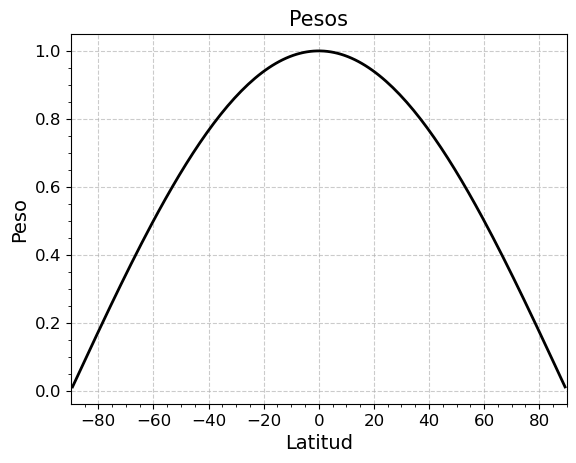

In [9]:
plt.plot(lats,weights,c='k',linewidth=2)
lineplot_setup(-90,90,'Latitud','Peso',title='Pesos')

El cálculo del promedio ponderado implica multiplicar cada valor por su peso correspondiente, sumar los productos y luego dividir la suma total por la suma de los pesos. Matemáticamente, el promedio ponderado se calcula de la siguiente fórmula:

\begin{align}
\mu_p=\frac{\sum_{i=1}^n w_i x_i}{\sum_{i=1}^n w_i}
\end{align}

Donde:

- $x_i$ son los valores individuales que se están promediando.
- $w_i$ son los pesos correspondientes a cada valor xixi​.
- $n$ es el número total de valores.

Antes de calcular el promedio, xarray tiene una función llamada "weighted". 
La función `weighted()` en Xarray es una herramienta útil para calcular promedios ponderados o con pesos en conjuntos de datos multidimensionales. Esta función permite aplicar pesos a los datos a lo largo de una o varias dimensiones y luego calcular un promedio ponderado utilizando esos pesos.

Ejemplos de promedios ponderados:

- El promedio de calificación en una materia. 
- El promedio anual de una variable calculado a partir de promedios mensuales. 


In [10]:
# agregando los pesos a un nuevo objeto de xarray 
tas_weighted = tas.weighted(weights)

Con el nuevo objeto de xarray, sí podemos calcular los promedios.

In [11]:
global2=tas_weighted.mean(['lon','lat'])
global2

<xarray.DataArray 'tas' (time: 780)> Size: 6kB
array([284.94802658, 284.80051402, 285.34278295, 286.57713214,
       287.54376247, 288.3725798 , 288.74287985, 288.7416493 ,
       287.9531139 , 286.93424365, 285.7625312 , 284.66429594,
       284.4145961 , 284.48107673, 285.26696264, 286.6627411 ,
       287.67660712, 288.30651295, 288.7501318 , 288.70246519,
       287.99962332, 286.96214805, 286.10255516, 285.20084498,
       284.8081688 , 284.67628829, 285.5885243 , 286.60470689,
       287.48283945, 288.4969254 , 288.79294441, 288.6719897 ,
       288.06509184, 287.15444681, 286.22870982, 285.44804279,
       285.15126654, 285.19766426, 285.78326801, 286.92723345,
       287.86200606, 288.58477481, 288.86910508, 288.885945  ,
       288.09757339, 287.15209054, 286.14553657, 285.40870027,
       284.98496404, 284.90084523, 285.62742799, 286.7652981 ,
       287.46548202, 288.42083345, 288.83130197, 288.7158608 ,
       288.07948568, 287.12973992, 286.05113562, 285.17214238,
       284.54364491, 284.76388565, 285.44412077, 286.46892099,
       287.50174632, 288.19984202, 288.75052596, 288.64085352,
       288.08364567, 286.94920252, 286.0126202 , 285.20597625,
       284.79760151, 285.00444246, 285.88452052, 286.66286207,
       287.6602044 , 288.47552134, 288.82024864, 288.81858512,
...
       288.37789348, 289.03470302, 289.63342248, 289.6001199 ,
       288.91517814, 287.95813683, 286.80044216, 285.85395846,
       285.49919695, 285.52939609, 286.34846721, 287.25987487,
       288.37941   , 289.10193687, 289.64174173, 289.60430928,
       289.02200781, 288.03631797, 286.79853354, 286.0555512 ,
       285.62458316, 285.70087272, 286.39967201, 287.59471232,
       288.46236814, 289.34366198, 289.74141437, 289.84244744,
       289.20586873, 288.20511371, 287.00876299, 286.41726493,
       285.87264258, 286.18381993, 286.6979487 , 287.74651763,
       288.62348329, 289.5083778 , 290.02767651, 289.86914184,
       289.25964676, 288.34107334, 287.10411082, 286.25767863,
       285.91786347, 286.01628588, 286.60527202, 287.6168497 ,
       288.54942257, 289.47320076, 289.88923433, 289.86682395,
       289.15361441, 288.11818074, 287.01311983, 286.23014824,
       285.72972506, 285.86750611, 286.68044653, 287.56907925,
       288.5150123 , 289.36703295, 289.90011927, 289.91443368,
       289.1256079 , 288.32181192, 287.22701253, 286.097898  ,
       285.79538821, 286.11452381, 286.65527369, 287.70709949,
       288.76202152, 289.63963379, 290.01476931, 290.07639294,
       289.32587195, 288.27214291, 287.16432839, 286.22094815])
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    height   float64 8B 1.5

In [13]:
datetimeindex = tas.indexes['time'].to_datetimeindex()
datetimeindex

/tmp/ipykernel_701/2370442549.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = tas.indexes['time'].to_datetimeindex()


DatetimeIndex(['1950-01-16', '1950-02-16', '1950-03-16', '1950-04-16',
               '1950-05-16', '1950-06-16', '1950-07-16', '1950-08-16',
               '1950-09-16', '1950-10-16',
               ...
               '2014-03-16', '2014-04-16', '2014-05-16', '2014-06-16',
               '2014-07-16', '2014-08-16', '2014-09-16', '2014-10-16',
               '2014-11-16', '2014-12-16'],
              dtype='datetime64[ns]', length=780, freq=None)

In [14]:
global1-273.15

<xarray.DataArray 'tas' (time: 780)> Size: 3kB
array([2.4602966 , 1.1360779 , 1.1269836 , 2.6898804 , 4.776062  ,
       6.369171  , 6.8672485 , 6.6172485 , 5.1766663 , 4.0164795 ,
       3.33786   , 2.5481262 , 2.0995789 , 1.0054016 , 1.0247192 ,
       2.9186096 , 5.2810364 , 6.2793274 , 6.933075  , 6.766815  ,
       5.565033  , 4.017334  , 3.8491821 , 3.1476746 , 2.5484314 ,
       1.2469482 , 1.6002502 , 2.7584534 , 4.432495  , 6.8230286 ,
       6.78183   , 6.30484   , 5.187866  , 4.4396057 , 3.8383484 ,
       3.401123  , 3.0334473 , 2.097992  , 1.4339294 , 3.2912903 ,
       5.459778  , 6.8329773 , 6.856201  , 6.8604126 , 5.5030212 ,
       4.1554565 , 3.9561462 , 3.4802246 , 2.9839478 , 1.8114014 ,
       1.3981018 , 3.1913757 , 4.559387  , 6.6320496 , 7.2724304 ,
       6.877533  , 5.6766663 , 4.567505  , 3.7615051 , 3.4242249 ,
       2.8322754 , 1.9380188 , 1.3923035 , 2.7193604 , 4.960205  ,
       6.0882263 , 7.082062  , 6.4341736 , 5.668915  , 3.9897766 ,
       3.6548767 , 3.692505  , 2.7615051 , 1.6069641 , 2.045044  ,
       2.8129272 , 4.900177  , 6.562378  , 6.7759094 , 6.8422546 ,
       6.018799  , 4.551758  , 3.574585  , 3.3156128 , 2.6295776 ,
       1.9126587 , 1.8682861 , 3.0635376 , 5.019989  , 6.552643  ,
       7.216675  , 6.580139  , 5.404541  , 4.3597717 , 3.727234  ,
       3.4472961 , 2.7145386 , 1.7712097 , 1.5339355 , 2.940857  ,
...
       2.6922607 , 2.6377563 , 3.895935  , 5.9933777 , 7.756897  ,
       7.839752  , 7.8634033 , 6.4450684 , 5.1720886 , 4.540161  ,
       4.405609  , 3.5328064 , 2.706604  , 2.403839  , 3.7442932 ,
       6.0766907 , 7.2562256 , 7.909424  , 7.6012573 , 6.7127686 ,
       5.805908  , 4.7201233 , 3.9930115 , 3.330597  , 2.3735046 ,
       2.3353882 , 3.58786   , 5.8424683 , 7.02652   , 7.9110107 ,
       7.5368958 , 6.7487183 , 5.301056  , 4.328308  , 4.342041  ,
       3.5609741 , 2.723297  , 3.0217285 , 3.9320068 , 5.8583374 ,
       7.5517883 , 7.64505   , 7.921356  , 6.777893  , 5.8614807 ,
       4.8067017 , 4.664093  , 3.884491  , 3.1122437 , 2.6937866 ,
       4.429657  , 5.8800964 , 7.556061  , 8.491882  , 7.85614   ,
       7.0062256 , 5.8974304 , 5.1535645 , 4.621826  , 4.151306  ,
       3.1291504 , 2.5456848 , 3.9058228 , 5.877777  , 7.703064  ,
       8.237671  , 7.9862976 , 6.8320923 , 5.572876  , 5.222931  ,
       4.5974426 , 3.4325256 , 2.7642822 , 2.6603088 , 3.833374  ,
       6.044861  , 7.529846  , 8.334869  , 8.17511   , 6.8651733 ,
       6.1170654 , 5.140869  , 4.402893  , 4.018524  , 3.125824  ,
       2.555725  , 4.24646   , 6.361145  , 7.7720337 , 8.138733  ,
       8.322723  , 7.183319  , 5.647064  , 5.0892944 , 4.6585693 ],
      dtype=float32)
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    height   float64 8B ...

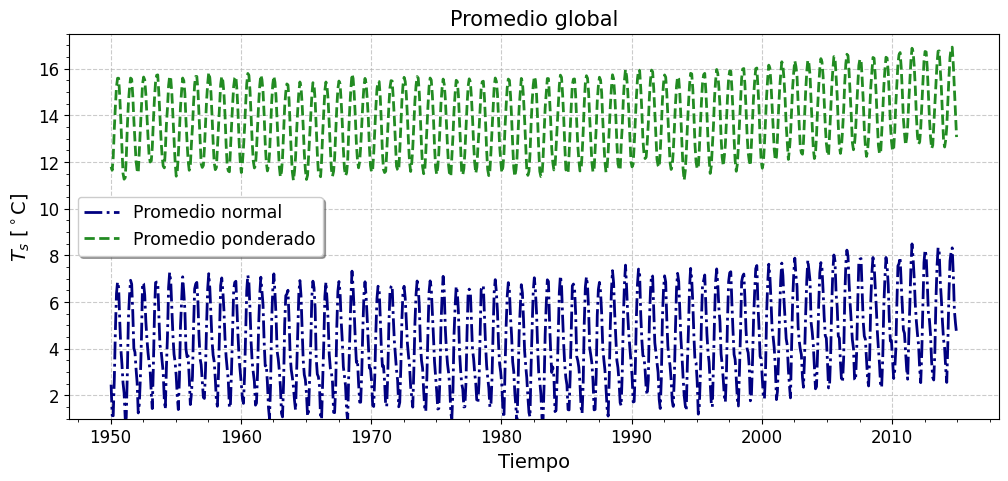

In [15]:
plt.figure(figsize=(12,5))
# convertimos los datos a Celsius 
plt.plot(datetimeindex,global1-273.15,c='navy',label='Promedio normal',linewidth=2,linestyle='-.')
plt.plot(datetimeindex,global2-273.15,c='forestgreen',label='Promedio ponderado',linewidth=2,linestyle='--')
lineplot_setup(None,None,'Tiempo','$T_s$ [$^\circ$C]',title='Promedio global',ymin=1,ymax=17.5,legend=True)

#### Conclusión

Cuando calculamos un promedio de área, es importante sopesar el área para tener en cuenta la variabilidad en la densidad de puntos de datos a lo largo de la región que estamos promediando. Esto es particularmente relevante cuando estamos trabajando con datos geoespaciales o datos distribuidos en un área irregular.

Al sopesar el área, estamos asegurando que cada punto dentro de la región contribuya al promedio en **proporción a su área**. Esto garantiza que los datos de áreas más grandes tengan un impacto proporcionalmente mayor en el promedio que los datos de áreas más pequeñas, lo que proporciona un promedio más representativo y equitativo de la región en su conjunto.


### **<font color="ForestGreen"> 2. El ciclo anual </font>**

El ciclo anual se refiere a la variación periódica que ocurre en una determinada variable a lo largo del año.
El ciclo anual es una característica común en muchas variables climáticas y ambientales, como la temperatura, la precipitación, la humedad, la radiación solar, la cobertura de nieve, entre otras. Estas variables muestran patrones estacionales consistentes a lo largo del año, que pueden variar según la ubicación geográfica y otras influencias locales.

Por ejemplo, en las regiones templadas del hemisferio norte, como Europa y América del Norte, la temperatura suele tener un ciclo anual con temperaturas más altas en verano y más bajas en invierno debido a la inclinación del eje de la Tierra y la mayor duración de la radiación solar en verano. En regiones monzónicas, la precipitación también tiene un ciclo anual muy pronunciado. 

En esta segunda parte del notebook, aprenderemos a calcular un ciclo anual. Para esto, vamos a seleccionar primero un punto para nuestro análisis, escogeremos alguno muy cercano a la CDMX. 

In [19]:
cdmx = tas.sel(lat=19,lon=260, method = 'nearest')

In [20]:
cdmx.time.dt.month

<xarray.DataArray 'month' (time: 780)> Size: 6kB
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) object 6kB 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    lat      float64 8B 19.38
    lon      float64 8B 259.7
    height   float64 8B ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [23]:
tas.sel(lat=19,lon=260,method='nearest')

<xarray.DataArray 'tas' (time: 780)>
array([286.80664, 288.5442 , 290.8147 , ..., 290.54053, 288.31836, 287.26074],
      dtype=float32)
Coordinates:
  * time     (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
    lat      float64 19.38
    lon      float64 259.7
    height   float64 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

In [24]:
cdmx=tas.sel(lat=19,lon=260,method='nearest')

Para el cálculo, es necesario pensar en qué significa un ciclo anual. 

Un ciclo anual es producto de las variaciones promedio o típicas a lo largo del año. Para tener un ciclo anual se calculan promedios temporales para cada período del año (por ejemplo, cada mes o cada estación). Esto permite obtener una representación promedio de la variable en cada período del año. Por ejemplo, esto permite ver que en México llueve más en verano que en diciembre, aunque no quiere decir que no llueve en diciembre o que todos los días en verano son lluviosos. 

Una manera fácil de calcular un promedio a lo largo de un grupo de datos es con la función `xr.DataArray.groupby()`, apoyados del método `.mean()`. El primero de ellos agrupa los datos dado una dimensión, condición o arreglo que sea de la misma longitud que la dimensión a considerar, en este caso el tiempo. 

La instrucción completa se lee:

`xr.DataArray.groupby(grupo).mean()`

Un tipo de grupo por ejemplo podría ser una serie de latitudes o longitudes o un arreglo del tiempo, por ejemplo:

In [26]:
cdmx.groupby(cdmx.time.dt.season).mean()

<xarray.DataArray 'tas' (season: 4)>
array([286.4925 , 290.93585, 291.02057, 289.1167 ], dtype=float32)
Coordinates:
    lat      float64 19.38
    lon      float64 259.7
    height   float64 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

Haremos nuestro ciclo anual con respecto a los promedios para cada mes. Esto quiere decir modificar nuestra instrucción a:

In [27]:
mensual=cdmx.groupby(cdmx.time.dt.month).mean()

In [28]:
mensual

<xarray.DataArray 'tas' (month: 12)>
array([286.06256, 287.27863, 289.78702, 291.59344, 291.68124, 291.63922,
       290.5781 , 290.59027, 290.35004, 289.35394, 287.64612, 286.1363 ],
      dtype=float32)
Coordinates:
    lat      float64 19.38
    lon      float64 259.7
    height   float64 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T12:07:37Z altered by CMOR: Treated scalar dime...

In [37]:
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

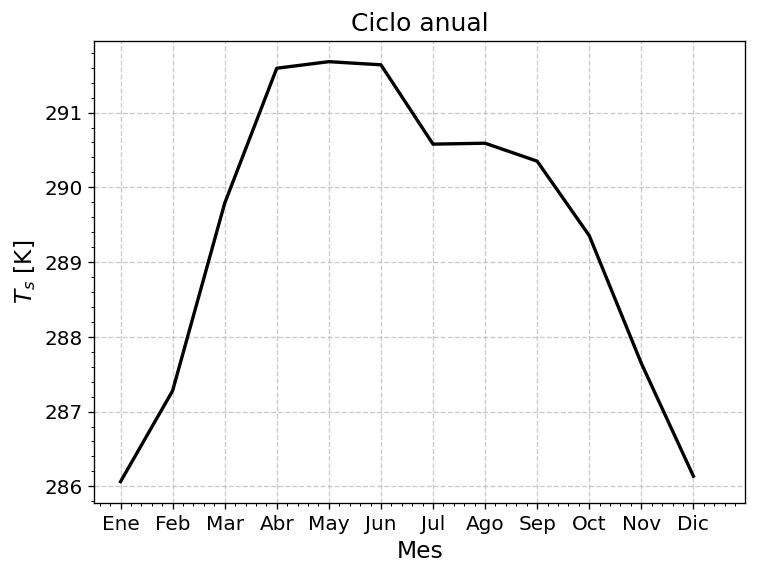

In [40]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(meses,mensual,linewidth=2,c='k')
lineplot_setup(-0.5,12,'Mes','$T_s$ [K]',title='Ciclo anual')

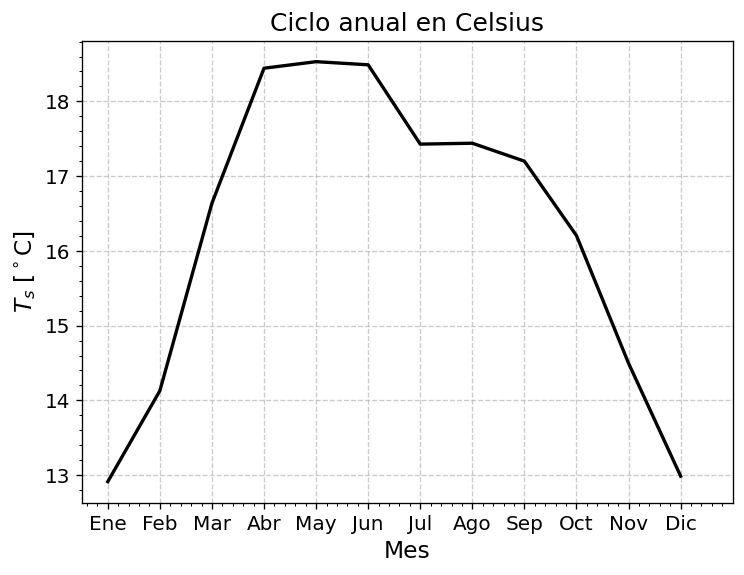

In [44]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(meses,mensual-273.15,linewidth=2,c='k')
lineplot_setup(-0.5,12,'Mes','$T_s$ [$^\circ$C]',title='Ciclo anual en Celsius')

El ciclo anual de temperatura en la Ciudad de México muestra características típicas de una ciudad ubicada en una región subtropical de altitud moderada pero fuertemente influenciada por la precipitación asociada al fenómeno del monzón.  Durante los meses de invierno, la Ciudad de México experimenta temperaturas más frescas debido a la insolación relativamente más baja. La insolación aumenta durante la primavera, aunado a condiciones secas de la atmósfera lo cuál quiere decir que la cobertura de nube es prácticamente cero durante los meses de Marzo, Abril y Mayo. En la transición al verano, la cobertura de nube empieza a aumentar junto con la precipitación debido al inicio del monzón. La cobertura de nube que inhibe la entrada de radiación solar y la precipitación, cuya evaporación en superficie enfría la superficie explican por qué en la estación con mayor insolación en el tope de la atmósfera vemos temperaturas más bajas que en primavera. 

Durante el otoño, la temperatura disminuye considerablemente con respecto a la del verano, parcialmente debido a la insolación que naturalmente disminuye pero también debido a las lluvias del monzón que duran hasta septiembre y octubre (intermitentemente). 

Estas variaciones con los meses, explicadas físicamente con argumentos radiativos y termodinámicos son lo que denominamos **el ciclo anual**.



---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 4 - El ciclo anual </font>**

<font color="DarkBlue"> 1. Seleccione los datos correspondientes del arreglo `tas` sobre el área de Australia. Su selección debe incluir todo el bloque de tierra de Australia pero no debe ser excesivamente más grande que el recuadro de Australia.
    
<font color="DarkBlue">  2. Calcule el promedio ponderado de su temperatura superficial, y obtenga una serie de tiempo. Grafique la serie de tiempo remuestreada a escala anual. 
    
<font color="DarkBlue"> 3. Grafique el ciclo anual de la temperatura superficial sobre Australia utilizando el arreglo que obtuvo en el punto 1.
    
---